In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from scipy.stats import skewtest, kurtosistest

#%matplotlib notebook

In [2]:

#フォント設定
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
#plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 15#24 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 13#22 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 13#22 # 軸だけ変更されます


#軸設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛りの向き
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛りの向き
#plt.rcParams['axes.grid'] = True # グリッドの作成
#plt.rcParams['grid.linestyle']='--' #グリッドの線種
plt.rcParams["xtick.minor.visible"] = True  #x軸補助目盛りの追加
plt.rcParams["ytick.minor.visible"] = False  #y軸補助目盛りの追加
plt.rcParams['xtick.top'] = False  #x軸の上部目盛り
plt.rcParams['ytick.right'] = False  #y軸の右部目盛り


#軸大きさ
#plt.rcParams["xtick.major.width"] = 1.0             #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.0             #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0             #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0             #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 8               #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 8               #y軸主目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 0                #x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 0                #y軸補助目盛り線の長さ
plt.rcParams["axes.linewidth"] = 2.0                #囲みの太さ


#凡例設定
plt.rcParams["legend.fancybox"] = False  # 丸角OFF
plt.rcParams["legend.framealpha"] = 1  # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black'  # edgeの色を変更
plt.rcParams["legend.markerscale"] = 5 #markerサイズの倍率

In [3]:
# データの読み込み
file_path = "For_Transaction_data_Comparison.csv"
data = pd.read_csv(file_path)
data.head()

,No,Growth_rate_of_total_assets_1,positive_count_1,negative_count_1,Median number of shares purchased_1,Med_purchase_num_1,Max_purchase_num_1,Total number of shares purchased_1,Med stock price at time of purchase_1,Med stock price change rate at time of purchase_1,...,Max_purchase_num_4,Total number of shares purchased_4,Med stock price at time of purchase_4,Med stock price change rate at time of purchase_4,Med number of shares sold_4,Med_disposal_num_4,Max_disposal_num_4,Total number of shares sold_4,Med stock price at time of sale_4,Med stock price change rate at time of sale_4
0,1,7.942774,5,6,0,100,100,500,2168.0,-20.760574,...,100,400,4618.0,-9.679936,0,100,100,300,6282.0,6.622095
1,2,30.329246,9,9,0,100,800,1900,2042.0,-20.760574,...,700,1800,4581.0,-8.544620,0,200,500,2000,5781.0,11.819379
2,3,9.782183,4,3,0,150,300,700,2353.5,-11.317694,...,400,800,4455.0,-10.846508,0,300,300,600,6490.0,4.509091
3,4,35.312727,10,6,0,200,500,2600,2267.5,-12.578519,...,300,1100,4781.0,-14.422880,0,300,500,1300,5427.0,13.045882
4,5,10.778879,5,3,0,100,300,700,1970.0,-18.173432,...,1000,2300,4455.0,-10.846508,0,500,500,2500,6135.0,10.916335


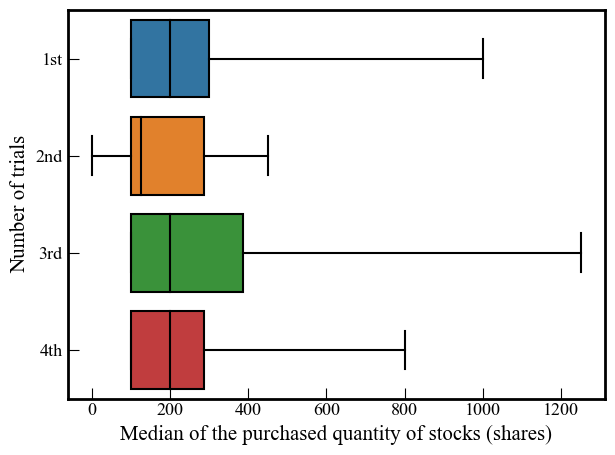

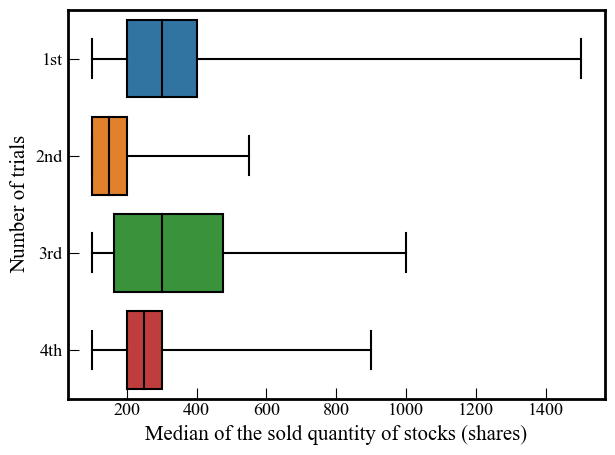

In [6]:
# Separate Kp, Ki, and Kd columns
#kp_columns = ['Kp_1', 'Kp_2', 'Kp_3', 'Kp_4']
abs_ki_columns = ['Med_purchase_num_1', 'Med_purchase_num_2', 'Med_purchase_num_3', 'Med_purchase_num_4']
abs_kd_columns = ['Med_disposal_num_1', 'Med_disposal_num_2', 'Med_disposal_num_3', 'Med_disposal_num_4']

# Melt the DataFrame to create a long-form dataset for Seaborn
#data_melted_kp = pd.melt(data, value_vars=kp_columns, var_name='Number of trials', value_name='Value')
data_melted_ki = pd.melt(data, value_vars=abs_ki_columns, var_name='Number of trials', value_name='Median of the purchased quantity of stocks (shares)')
data_melted_kd = pd.melt(data, value_vars=abs_kd_columns, var_name='Number of trials', value_name='Median of the sold quantity of stocks (shares)')
# Ki用のSeabornを使用してボックスプロットを作成
#plt.figure(figsize=(9, 6))
ax = sns.boxplot(
    #y='Median of the purchased quantity of stocks (shares)',
    #x= 'Number of trials',
    x='Median of the purchased quantity of stocks (shares)',
    y='Number of trials',
    medianprops=dict(color="black"),
    whiskerprops=dict(color='black'),
    data=data_melted_ki,
    boxprops=dict(edgecolor='black'),
    capprops=dict(color='black'),
    whis=[0, 100]  # 外れ値を最小値と最大値にする
)
#ax.yaxis.grid(False)  # 縦軸の補助線を非表示にする
#plt.title('Med_purchase_num')
#plt.xticks(range(0, len(abs_ki_columns)), ['1st', '2nd', '3rd', '4th'])
plt.yticks(range(0, len(abs_ki_columns)), ['1st', '2nd', '3rd', '4th'])
plt.tight_layout()
plt.savefig("卒論用2/BoxPlot_Med_purchase_num.png")
plt.show()

# Kd用のSeabornを使用してボックスプロットを作成
#plt.figure(figsize=(9, 6))
ax = sns.boxplot(
    y='Number of trials',
    x='Median of the sold quantity of stocks (shares)',
    medianprops=dict(color="black"),
    whiskerprops=dict(color='black'),
    data=data_melted_kd,
    boxprops=dict(edgecolor='black'),
    capprops=dict(color='black'),
    whis=[0, 100]  # 外れ値を最小値と最大値にする
)
#ax.yaxis.grid(False)  # 縦軸の補助線を非表示にする
#plt.title('Max_purchase_num')
plt.yticks(range(0, len(abs_kd_columns)), ['1st', '2nd', '3rd', '4th'])
plt.tight_layout()
plt.savefig("卒論用2/BoxPlot_Med_sold_num.png")
plt.show()



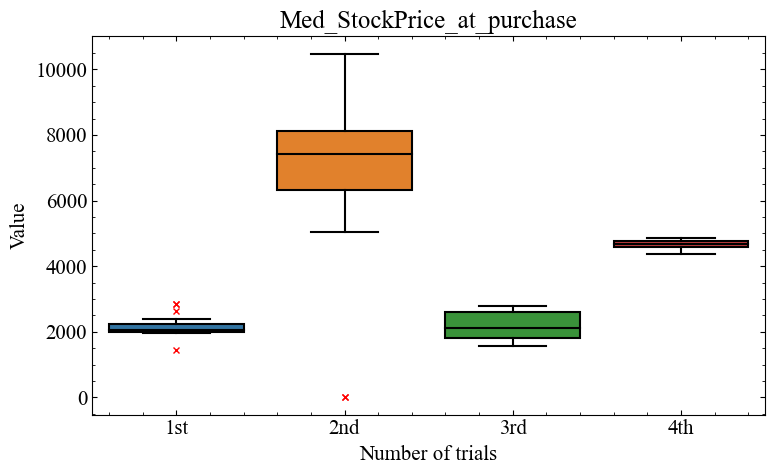

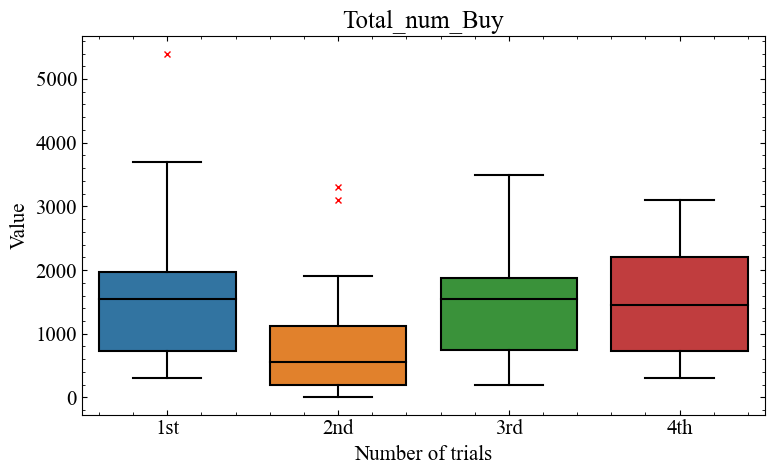

In [16]:

# Separate Kp, Ki, and Kd columns
#kp_columns = ['Kp_1', 'Kp_2', 'Kp_3', 'Kp_4']
ave_num_Buy_columns = ['Med stock price at time of purchase_1', 'Med stock price at time of purchase_2', 'Med stock price at time of purchase_3', 'Med stock price at time of purchase_4']
ave_SP_Buy_columns = ['Total number of shares purchased_1', 'Total number of shares purchased_2', 'Total number of shares purchased_3', 'Total number of shares purchased_4']

# Melt the DataFrame to create a long-form dataset for Seaborn
#data_melted_kp = pd.melt(data, value_vars=kp_columns, var_name='Number of trials', value_name='Value')
data_melted_ave_num_Buy = pd.melt(data, value_vars=ave_num_Buy_columns, var_name='Number of trials', value_name='Value')
data_melted_ave_SP_Buy = pd.melt(data, value_vars=ave_SP_Buy_columns, var_name='Number of trials', value_name='Value')

# Set the color palette for Seaborn
#palette1 = ['skyblue', 'skyblue', 'skyblue','skyblue']
#palette2 = ['orangered', 'orangered', 'orangered','orangered']
#palette3 = ['limegreen', 'limegreen', 'limegreen','limegreen']

# Set box properties for black lines
boxprops = dict(linewidth=1, color='black')

# Create boxplots using Seaborn for Ki
plt.figure(figsize=(8, 5))
sns.boxplot(x='Number of trials', y='Value', medianprops=dict(color="black"), whiskerprops=dict(color='black'),data=data_melted_ave_num_Buy, boxprops=dict(edgecolor='black'), capprops=dict(color='black'), flierprops=dict(marker="x", markeredgecolor="red"))
plt.title('Med_StockPrice_at_purchase')
plt.xticks(range(0, len(ave_num_Buy_columns)), ['1st', '2nd', '3rd', '4th'])
plt.tight_layout()
plt.savefig("BoxPlot_Med_StockPrice_at_purchase.png")
plt.show()

# Create boxplots using Seaborn for Kd
plt.figure(figsize=(8, 5))
sns.boxplot(x='Number of trials', y='Value', medianprops=dict(color="black"), whiskerprops=dict(color='black'),data=data_melted_ave_SP_Buy, boxprops=dict(edgecolor='black'), capprops=dict(color='black'), flierprops=dict(marker="x", markeredgecolor="red"))
plt.title('Total_num_Buy')
plt.xticks(range(0, len(ave_SP_Buy_columns)), ['1st', '2nd', '3rd', '4th'])
plt.tight_layout()
plt.savefig("BoxPlot_Total_num_Buy.png")
plt.show()

C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\305850916.py:15: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\305850916.py:15: UserWarning: Glyph 12508 (\N{KATAKANA LETTER BO}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\305850916.py:15: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\305850916.py:15: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\305850916.py:15: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\305850916.py:15: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from current font.
  plt.tight_layout()
C:\U

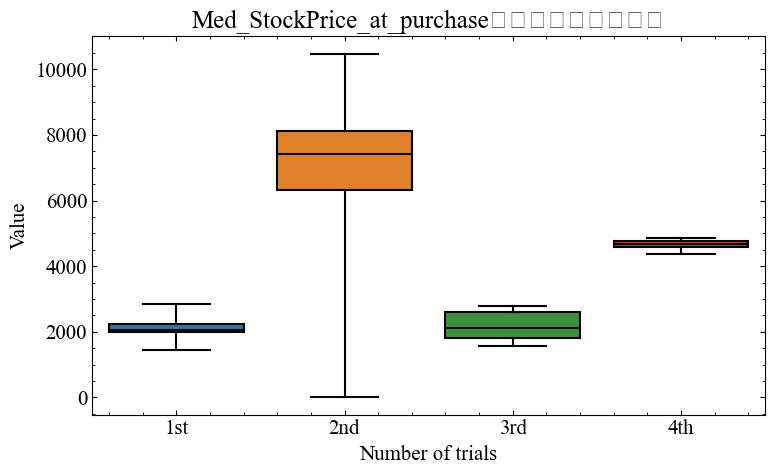

C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\305850916.py:33: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\305850916.py:33: UserWarning: Glyph 12508 (\N{KATAKANA LETTER BO}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\305850916.py:33: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\305850916.py:33: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\305850916.py:33: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\305850916.py:33: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from current font.
  plt.tight_layout()
C:\U

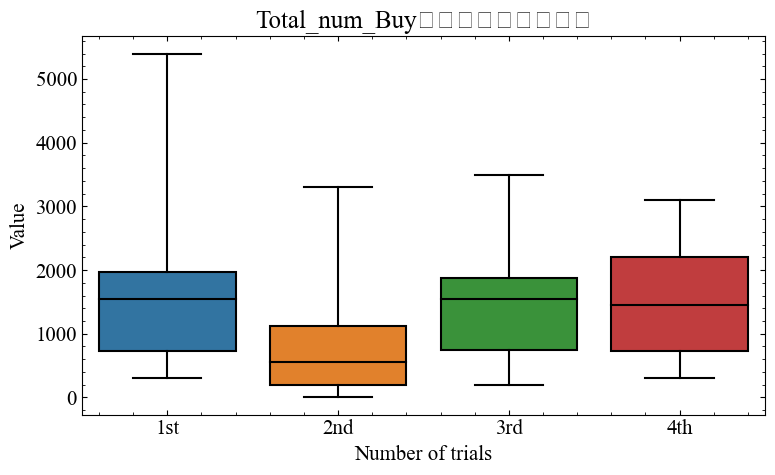

In [17]:
# Med_StockPrice_at_purchase用のSeabornを使用してボックスプロットを作成
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Number of trials', 
    y='Value', 
    medianprops=dict(color="black"), 
    whiskerprops=dict(color='black'),
    data=data_melted_ave_num_Buy, 
    boxprops=dict(edgecolor='black'), 
    capprops=dict(color='black'),
    whis=[0, 100]  # 外れ値を最小値と最大値にする
)
plt.title('Med_StockPrice_at_purchaseのボックスプロット')
plt.xticks(range(0, len(ave_num_Buy_columns)), ['1st', '2nd', '3rd', '4th'])
plt.tight_layout()
plt.savefig("BoxPlot_Med_StockPrice_at_purchase.png")
plt.show()

# Total_num_Buy用のSeabornを使用してボックスプロットを作成
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Number of trials',
    y='Value',
    medianprops=dict(color="black"),
    whiskerprops=dict(color='black'),
    data=data_melted_ave_SP_Buy,
    boxprops=dict(edgecolor='black'),
    capprops=dict(color='black'),
    whis=[0, 100]  # 外れ値を最小値と最大値にする
)
plt.title('Total_num_Buyのボックスプロット')
plt.xticks(range(0, len(ave_SP_Buy_columns)), ['1st', '2nd', '3rd', '4th'])
plt.tight_layout()
plt.savefig("BoxPlot_Total_num_Buy.png")
plt.show()

C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\2874243393.py:15: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\2874243393.py:15: UserWarning: Glyph 12508 (\N{KATAKANA LETTER BO}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\2874243393.py:15: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\2874243393.py:15: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\2874243393.py:15: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\2874243393.py:15: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from current font.
  plt.tight_layout(

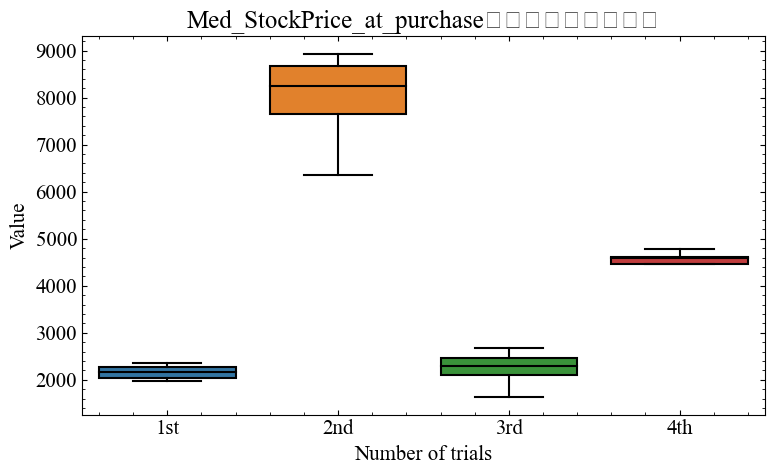

C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\2874243393.py:33: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\2874243393.py:33: UserWarning: Glyph 12508 (\N{KATAKANA LETTER BO}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\2874243393.py:33: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\2874243393.py:33: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\2874243393.py:33: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  plt.tight_layout()
C:\Users\Utsuk\AppData\Local\Temp\ipykernel_29592\2874243393.py:33: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from current font.
  plt.tight_layout(

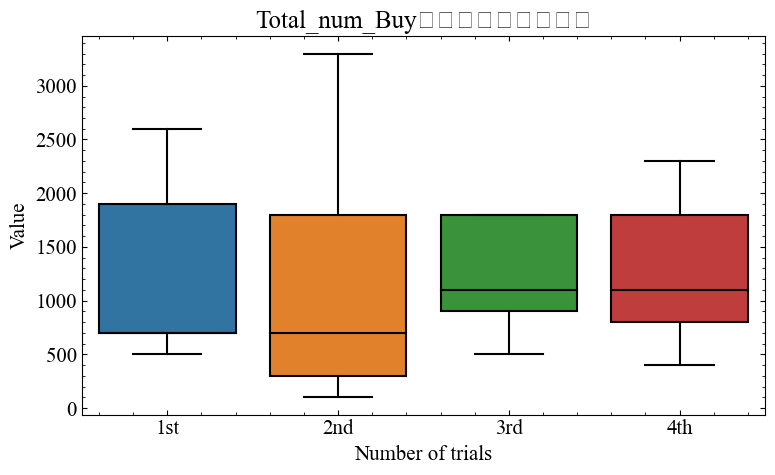

In [11]:
# Med_StockPrice_at_purchase用のSeabornを使用してボックスプロットを作成
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Number of trials', 
    y='Value', 
    medianprops=dict(color="black"), 
    whiskerprops=dict(color='black'),
    data=data_melted_ave_num_Buy, 
    boxprops=dict(edgecolor='black'), 
    capprops=dict(color='black'),
    whis=[0, 100]  # 外れ値を最小値と最大値にする
)
plt.title('Med_StockPrice_at_purchaseのボックスプロット')
plt.xticks(range(0, len(ave_num_Buy_columns)), ['1st', '2nd', '3rd', '4th'])
plt.tight_layout()
plt.savefig("BoxPlot_Med_StockPrice_at_purchase.png")
plt.show()

# Total_num_Buy用のSeabornを使用してボックスプロットを作成
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Number of trials', 
    y='Value', 
    medianprops=dict(color="black"), 
    whiskerprops=dict(color='black'),
    data=data_melted_ave_SP_Buy, 
    boxprops=dict(edgecolor='black'), 
    capprops=dict(color='black'),
    whis=[0, 100]  # 外れ値を最小値と最大値にする
)
plt.title('Total_num_Buyのボックスプロット')
plt.xticks(range(0, len(ave_SP_Buy_columns)), ['1st', '2nd', '3rd', '4th'])
plt.tight_layout()
plt.savefig("BoxPlot_Total_num_Buy.png")
plt.show()


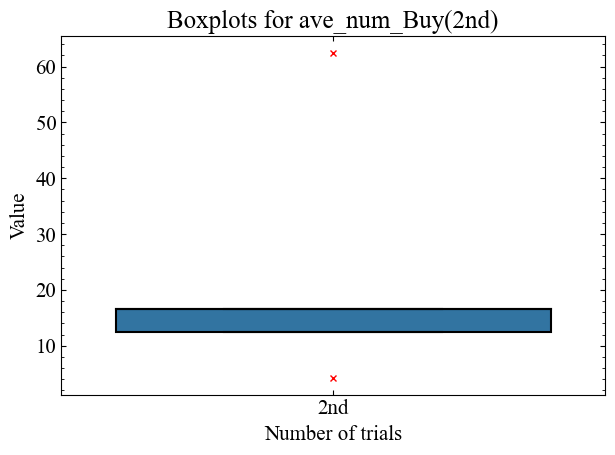

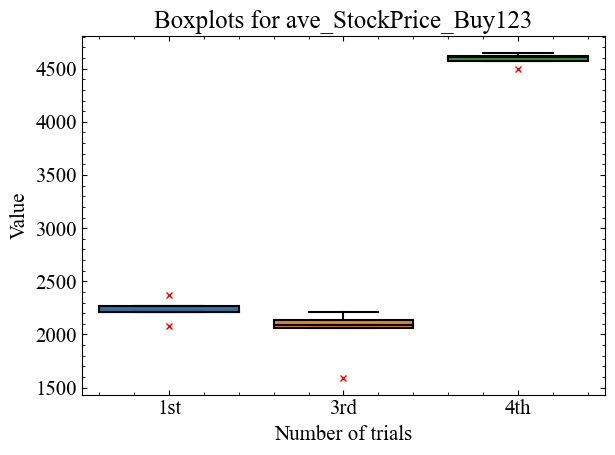

In [27]:

# Separate Kp, Ki, and Kd columns
#kp_columns = ['Kp_1', 'Kp_2', 'Kp_3', 'Kp_4']
ave_num_Buy_columns2 = ['Average number of shares purchased_2']
ave_SP_Buy_columns2 = ['Average stock price at time of purchase_1', 'Average stock price at time of purchase_3', 'Average stock price at time of purchase_4']

# Melt the DataFrame to create a long-form dataset for Seaborn
#data_melted_kp = pd.melt(data, value_vars=kp_columns, var_name='Number of trials', value_name='Value')
data_melted_ave_num_Buy2 = pd.melt(data, value_vars=ave_num_Buy_columns2, var_name='Number of trials', value_name='Value')
data_melted_ave_SP_Buy2 = pd.melt(data, value_vars=ave_SP_Buy_columns2, var_name='Number of trials', value_name='Value')

# Set the color palette for Seaborn
#palette1 = ['skyblue', 'skyblue', 'skyblue','skyblue']
#palette2 = ['orangered', 'orangered', 'orangered','orangered']
#palette3 = ['limegreen', 'limegreen', 'limegreen','limegreen']

# Set box properties for black lines
boxprops = dict(linewidth=1, color='black')

# Create boxplots using Seaborn for Ki
#plt.figure(figsize=("auto"))
sns.boxplot(x='Number of trials', y='Value', medianprops=dict(color="black"), whiskerprops=dict(color='black'),data=data_melted_ave_num_Buy2, boxprops=dict(edgecolor='black'), capprops=dict(color='black'), flierprops=dict(marker="x", markeredgecolor="red"))
plt.title('Boxplots for ave_num_Buy(2nd)')
plt.xticks(range(0, len(ave_num_Buy_columns2)), ['2nd'])
plt.tight_layout()
plt.savefig("BoxPlot_ave_num_Buy_2nd.png")
plt.show()

# Create boxplots using Seaborn for Kd
#plt.figure(figsize=(8, 5))
sns.boxplot(x='Number of trials', y='Value', medianprops=dict(color="black"), whiskerprops=dict(color='black'),data=data_melted_ave_SP_Buy2, boxprops=dict(edgecolor='black'), capprops=dict(color='black'), flierprops=dict(marker="x", markeredgecolor="red"))
plt.title('Boxplots for ave_StockPrice_Buy123')
plt.xticks(range(0, len(ave_SP_Buy_columns2)), ['1st', '3rd', '4th'])
plt.tight_layout()
plt.savefig("BoxPlot_ave_SP_Buy123.png")
plt.show()

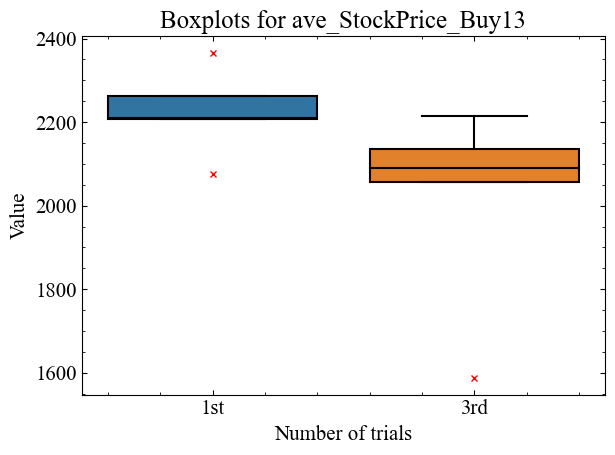

In [28]:
# Separate Kp, Ki, and Kd columns
#kp_columns = ['Kp_1', 'Kp_2', 'Kp_3', 'Kp_4']
#ave_num_Buy_columns2 = ['Average number of shares purchased_2']
ave_SP_Buy_columns3 = ['Average stock price at time of purchase_1', 'Average stock price at time of purchase_3']

# Melt the DataFrame to create a long-form dataset for Seaborn
#data_melted_kp = pd.melt(data, value_vars=kp_columns, var_name='Number of trials', value_name='Value')
#data_melted_ave_num_Buy2 = pd.melt(data, value_vars=ave_num_Buy_columns2, var_name='Number of trials', value_name='Value')
data_melted_ave_SP_Buy3 = pd.melt(data, value_vars=ave_SP_Buy_columns3, var_name='Number of trials', value_name='Value')

# Set the color palette for Seaborn
#palette1 = ['skyblue', 'skyblue', 'skyblue','skyblue']
#palette2 = ['orangered', 'orangered', 'orangered','orangered']
#palette3 = ['limegreen', 'limegreen', 'limegreen','limegreen']

# Set box properties for black lines
boxprops = dict(linewidth=1, color='black')
# Create boxplots using Seaborn for Kd
#plt.figure(figsize=(8, 5))
sns.boxplot(x='Number of trials', y='Value', medianprops=dict(color="black"), whiskerprops=dict(color='black'),data=data_melted_ave_SP_Buy3, boxprops=dict(edgecolor='black'), capprops=dict(color='black'), flierprops=dict(marker="x", markeredgecolor="red"))
plt.title('Boxplots for ave_StockPrice_Buy13')
plt.xticks(range(0, len(ave_SP_Buy_columns3)), ['1st', '3rd'])
plt.tight_layout()
plt.savefig("BoxPlot_ave_SP_Buy13.png")
plt.show()

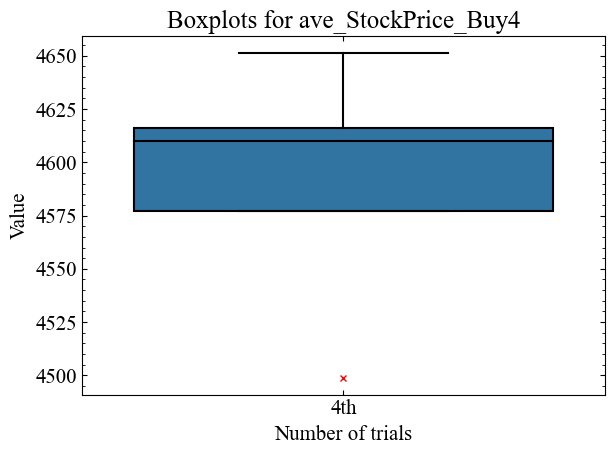

In [29]:
# Separate Kp, Ki, and Kd columns
#kp_columns = ['Kp_1', 'Kp_2', 'Kp_3', 'Kp_4']
#ave_num_Buy_columns2 = ['Average number of shares purchased_2']
ave_SP_Buy_columns4 = ['Average stock price at time of purchase_4']

# Melt the DataFrame to create a long-form dataset for Seaborn
#data_melted_kp = pd.melt(data, value_vars=kp_columns, var_name='Number of trials', value_name='Value')
#data_melted_ave_num_Buy2 = pd.melt(data, value_vars=ave_num_Buy_columns2, var_name='Number of trials', value_name='Value')
data_melted_ave_SP_Buy4 = pd.melt(data, value_vars=ave_SP_Buy_columns4, var_name='Number of trials', value_name='Value')

# Set the color palette for Seaborn
#palette1 = ['skyblue', 'skyblue', 'skyblue','skyblue']
#palette2 = ['orangered', 'orangered', 'orangered','orangered']
#palette3 = ['limegreen', 'limegreen', 'limegreen','limegreen']

# Set box properties for black lines
boxprops = dict(linewidth=1, color='black')
# Create boxplots using Seaborn for Kd
#plt.figure(figsize=(8, 5))
sns.boxplot(x='Number of trials', y='Value', medianprops=dict(color="black"), whiskerprops=dict(color='black'),data=data_melted_ave_SP_Buy4, boxprops=dict(edgecolor='black'), capprops=dict(color='black'), flierprops=dict(marker="x", markeredgecolor="red"))
plt.title('Boxplots for ave_StockPrice_Buy4')
plt.xticks(range(0, len(ave_SP_Buy_columns4)), ['4th'])
plt.tight_layout()
plt.savefig("BoxPlot_ave_SP_Buy4th.png")
plt.show()

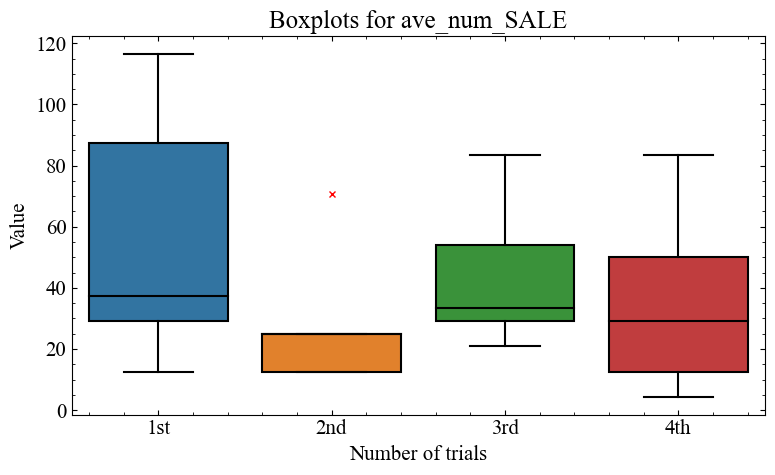

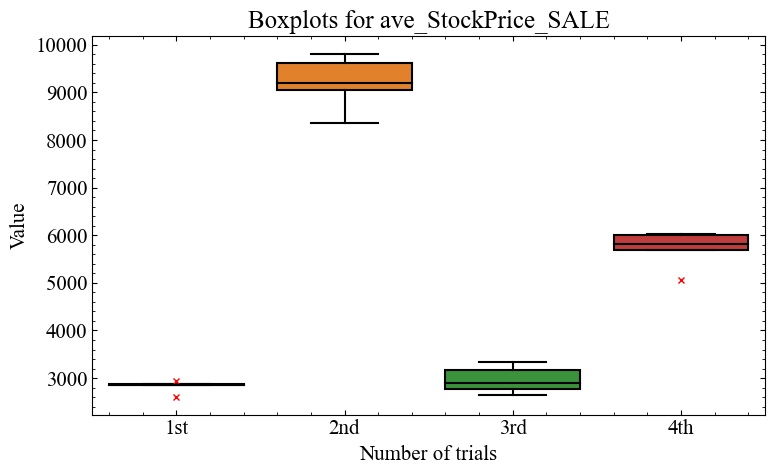

In [7]:
# Separate Kp, Ki, and Kd columns
#kp_columns = ['Kp_1', 'Kp_2', 'Kp_3', 'Kp_4']
ave_num_Buy_columns = ['Average number of shares sold_1', 'Average number of shares sold_2', 'Average number of shares sold_3', 'Average number of shares sold_4']
ave_SP_Buy_columns = ['Average stock price at time of sale_1','Average stock price at time of sale_2','Average stock price at time of sale_3','Average stock price at time of sale_4']

# Melt the DataFrame to create a long-form dataset for Seaborn
#data_melted_kp = pd.melt(data, value_vars=kp_columns, var_name='Number of trials', value_name='Value')
data_melted_ave_num_Buy = pd.melt(data, value_vars=ave_num_Buy_columns, var_name='Number of trials', value_name='Value')
data_melted_ave_SP_Buy = pd.melt(data, value_vars=ave_SP_Buy_columns, var_name='Number of trials', value_name='Value')

# Set the color palette for Seaborn
#palette1 = ['skyblue', 'skyblue', 'skyblue','skyblue']
#palette2 = ['orangered', 'orangered', 'orangered','orangered']
#palette3 = ['limegreen', 'limegreen', 'limegreen','limegreen']

# Set box properties for black lines
boxprops = dict(linewidth=1, color='black')

# Create boxplots using Seaborn for Ki
plt.figure(figsize=(8, 5))
sns.boxplot(x='Number of trials', y='Value', medianprops=dict(color="black"), whiskerprops=dict(color='black'),data=data_melted_ave_num_Buy, boxprops=dict(edgecolor='black'), capprops=dict(color='black'), flierprops=dict(marker="x", markeredgecolor="red"))
plt.title('Boxplots for ave_num_SALE')
plt.xticks(range(0, len(ave_num_Buy_columns)), ['1st', '2nd', '3rd', '4th'])
plt.tight_layout()
plt.savefig("BoxPlot_ave_num_SALE.png")
plt.show()

# Create boxplots using Seaborn for Kd
plt.figure(figsize=(8, 5))
sns.boxplot(x='Number of trials', y='Value', medianprops=dict(color="black"), whiskerprops=dict(color='black'),data=data_melted_ave_SP_Buy, boxprops=dict(edgecolor='black'), capprops=dict(color='black'), flierprops=dict(marker="x", markeredgecolor="red"))
plt.title('Boxplots for ave_StockPrice_SALE')
plt.xticks(range(0, len(ave_SP_Buy_columns)), ['1st', '2nd', '3rd', '4th'])
plt.tight_layout()
plt.savefig("BoxPlot_ave_SP_SALE.png")#ave_StockPrice_SALE
plt.show()

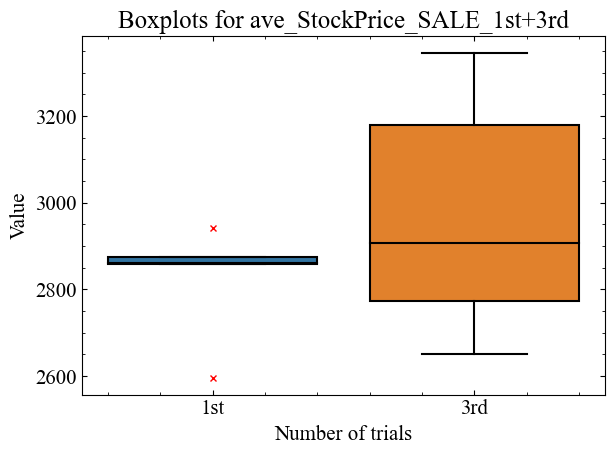

In [8]:
# Separate Kp, Ki, and Kd columns
#kp_columns = ['Kp_1', 'Kp_2', 'Kp_3', 'Kp_4']
#ave_num_Buy_columns = ['Average number of shares sold_1', 'Average number of shares sold_2', 'Average number of shares sold_3', 'Average number of shares sold_4']
ave_SP_Buy_columns = ['Average stock price at time of sale_1','Average stock price at time of sale_3']

# Melt the DataFrame to create a long-form dataset for Seaborn
#data_melted_kp = pd.melt(data, value_vars=kp_columns, var_name='Number of trials', value_name='Value')
#data_melted_ave_num_Buy = pd.melt(data, value_vars=ave_num_Buy_columns, var_name='Number of trials', value_name='Value')
data_melted_ave_SP_Buy = pd.melt(data, value_vars=ave_SP_Buy_columns, var_name='Number of trials', value_name='Value')

# Set the color palette for Seaborn
#palette1 = ['skyblue', 'skyblue', 'skyblue','skyblue']
#palette2 = ['orangered', 'orangered', 'orangered','orangered']
#palette3 = ['limegreen', 'limegreen', 'limegreen','limegreen']

# Set box properties for black lines
boxprops = dict(linewidth=1, color='black')


# Create boxplots using Seaborn for Kd
#plt.figure(figsize=(8, 5))
sns.boxplot(x='Number of trials', y='Value', medianprops=dict(color="black"), whiskerprops=dict(color='black'),data=data_melted_ave_SP_Buy, boxprops=dict(edgecolor='black'), capprops=dict(color='black'), flierprops=dict(marker="x", markeredgecolor="red"))
plt.title('Boxplots for ave_StockPrice_SALE_1st+3rd')
plt.xticks(range(0, len(ave_SP_Buy_columns)), ['1st', '3rd'])
plt.tight_layout()
plt.savefig("BoxPlot_ave_SP_SALE_1st+3rd.png")
plt.show()

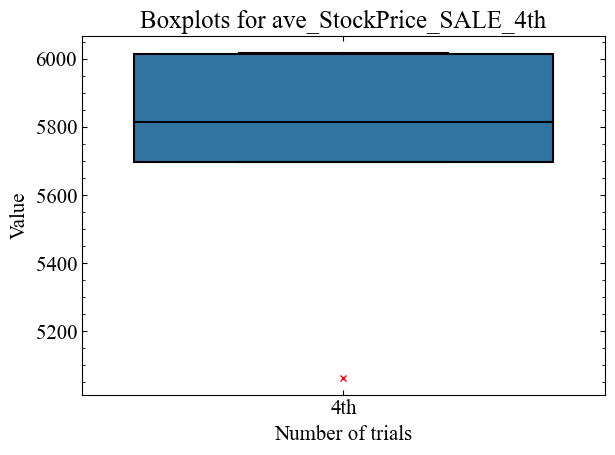

In [9]:
# Separate Kp, Ki, and Kd columns
#kp_columns = ['Kp_1', 'Kp_2', 'Kp_3', 'Kp_4']
#ave_num_Buy_columns = ['Average number of shares sold_1', 'Average number of shares sold_2', 'Average number of shares sold_3', 'Average number of shares sold_4']
ave_SP_Buy_columns = ['Average stock price at time of sale_4']

# Melt the DataFrame to create a long-form dataset for Seaborn
#data_melted_kp = pd.melt(data, value_vars=kp_columns, var_name='Number of trials', value_name='Value')
#data_melted_ave_num_Buy = pd.melt(data, value_vars=ave_num_Buy_columns, var_name='Number of trials', value_name='Value')
data_melted_ave_SP_Buy = pd.melt(data, value_vars=ave_SP_Buy_columns, var_name='Number of trials', value_name='Value')

# Set the color palette for Seaborn
#palette1 = ['skyblue', 'skyblue', 'skyblue','skyblue']
#palette2 = ['orangered', 'orangered', 'orangered','orangered']
#palette3 = ['limegreen', 'limegreen', 'limegreen','limegreen']





# Set box properties for black lines
boxprops = dict(linewidth=1, color='black')


# Create boxplots using Seaborn for Kd
#plt.figure(figsize=(8, 5))
sns.boxplot(x='Number of trials', y='Value', medianprops=dict(color="black"), whiskerprops=dict(color='black'),data=data_melted_ave_SP_Buy, boxprops=dict(edgecolor='black'), capprops=dict(color='black'), flierprops=dict(marker="x", markeredgecolor="red"))
plt.title('Boxplots for ave_StockPrice_SALE_4th')
plt.xticks(range(0, len(ave_SP_Buy_columns)), ['4th'])
plt.tight_layout()
plt.savefig("BoxPlot_ave_SP_SALE_4th.png")
plt.show()